In [2]:
import cv2
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

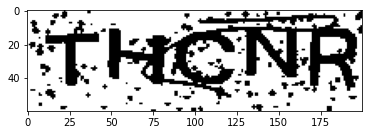

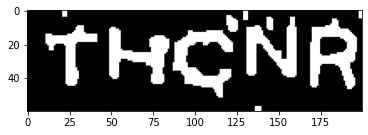

In [3]:
img = cv2.imread('CaptchaImage.jpeg', cv2.IMREAD_GRAYSCALE)
ret, binaryImg = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

cv2.erode(binaryImg, np.ones((2, 2), np.uint8), iterations = 1)
binaryImg = ~binaryImg
plt.imshow(binaryImg, cmap = "gray")
plt.show()

binaryImg = scipy.ndimage.median_filter(binaryImg, (5, 1))
binaryImg = scipy.ndimage.median_filter(binaryImg, (1, 3))

cv2.erode(binaryImg, np.ones((2, 2), np.uint8), iterations = 1)

binaryImg = scipy.ndimage.median_filter(binaryImg, (3, 3))

binaryImg = cv2.dilate(binaryImg, np.ones((3, 3), np.uint8), iterations = 1) # actually performs erosion
binaryImg = scipy.ndimage.median_filter(binaryImg, (5, 1)) # finally completely remove any extra noise that remains
binaryImg = cv2.erode(binaryImg, np.ones((3, 3), np.uint8), iterations = 2) # dilate image to make it look like the original
binaryImg = cv2.dilate(binaryImg, np.ones((3, 3), np.uint8), iterations = 1) # erode just a bit to polish fine details

binaryImg = ~binaryImg
plt.imshow(binaryImg, cmap = "gray")
plt.show()

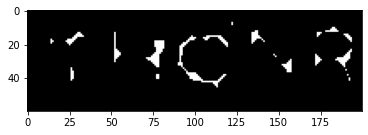

In [4]:
contours, hierarchy = cv2.findContours(binaryImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
cv2.drawContours(binaryImg, contours, -1, (0, 0, 255), 3)

plt.imshow(binaryImg, cmap = "gray")
plt.show()